## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset
data = pd.read_csv(r'/Users/reem/Desktop/ab_data.csv')

#read the top 5 rows
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# To find the number of (rows, columns):
print(data.shape)
# To find the number of rows only:
print(data.shape[0]) # there is 294478 rows

(294478, 5)
294478


c. The number of unique users in the dataset.

In [4]:
#To find the number of unique  users in the dataset:
data['user_id'].nunique() # there is 290584 unique  users.

290584

d. The proportion of users converted.

In [5]:
#To find the proportion of users converted:
data['converted'].mean() # the proportion is 0.11965

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# To find the number of times the new_page and treatment don't line up:
group1=data.query("group == 'treatment' & landing_page != 'new_page'")
group2=data.query("group != 'treatment' & landing_page == 'new_page'")

len(group1)+ len(group2) #the number of times the new_page and treatment don't line up is 3893

3893

f. Do any of the rows have missing values?

In [7]:
#display the summary of the dataset to check if there is missing values:
data.info()
print('___________________________')
#to find out the null and missing values:
print(data.isna().sum()) ## there is no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
___________________________
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#df2 a new dataframe from df for 3893 records,
#we excluded records where the new_page did not line up with the treatment
df2= data[((data.group == 'treatment') & (data.landing_page =='new_page'))|
                ((data.group=='control') & (data.landing_page =='old_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# To find the unique user_ids are in df2:
df2['user_id'].nunique() # there is 290584 unique user_ids in df2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#check the duplicates of user_id in df2
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#To find the information of user_id repeated in df2:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#removing duplicate rows
df2 = df2.drop_duplicates('user_id')
# then check agin if duplicated values are deleted or not
print(sum(df2.duplicated('user_id')))

0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# to find the probability of an individual converting regardless of the page they receive:
df2['converted'].mean() #the probability is 0.11959

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# to find the probability of control:
probability_control=df2.query("group == 'control'")['converted'].mean()
probability_control #the probability of control is 0.12038

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#  to find the probability of treatment:
probability_treatment= df2.query("group == 'treatment'")['converted'].mean()
probability_treatment #the probability of treatment is 0.11880

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#to find the probability of new page:
probability_new_page= (df2['landing_page']=="new_page").mean()
probability_new_page #the probability of received the new page is 0.50006

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**My answer:**

###### * The probability of an individual converting in the control group is 0.1203863045004612
###### * The probability of an individual converting in the treatment group is 0.11880806551510564

##### It is clear the results of the analysis above the control group is higher than treatment group which indicate that no conversions have been made between the new and old pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### **My answer**

##### *  $H_{0}$ : $p_{new}$ <= $p_{old}$ 
##### *  $H_{1}$: $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# The H0: P𝑛𝑒𝑤 <= P𝑜𝑙𝑑 
P_new= df2['converted'].mean()
P_new #the convert rate of p_new is 0.11959

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# The H0: P𝑛𝑒𝑤 <= P𝑜𝑙𝑑
P_old= df2['converted'].mean()
P_old ##the convert rate of p_old is 0.11959

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# find the number of users landed and new_page:
n_𝑛𝑒𝑤= df2.query('landing_page== "new_page"')['converted'].count()
n_𝑛𝑒𝑤 # = 145310

145310

d. What is $n_{old}$?

In [21]:
# find the number of users landed and pld_page:
n_𝑜𝑙𝑑= df2.query('landing_page== "old_page"')['converted'].count()
n_𝑜𝑙𝑑 # = 145274

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Simulate n_new transactions with a convert rate of P𝑛𝑒𝑤 under the null.
new_page_converted = np.random.choice([0,1], n_𝑛𝑒𝑤, p=[P_new, 1-P_old]).mean()
new_page_converted # = 0.87901

0.8790103915766293

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Simulate n_old transactions with a convert rate of P𝑜𝑙𝑑 under the null.
old_page_converted = np.random.choice([0,1], n_𝑜𝑙𝑑, p=[P_old, 1-P_new]).mean()
old_page_converted # = 0.88147

0.881417184079739

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# the different from Pnew and Pold:
diff= new_page_converted - old_page_converted
diff # = -0.0024067925031097115

-0.0024067925031097115

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# to creat simulate 10000 first creat loop distribution form the different of new and old page:
p_diffs=[]

for i in range(10000):
    new_page_converted = np.random.choice([0,1], n_𝑛𝑒𝑤, p=[P_new, 1-P_old]).mean()
    old_page_converted = np.random.choice([0,1], n_𝑜𝑙𝑑, p=[P_old, 1-P_new]).mean()
    diff= new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

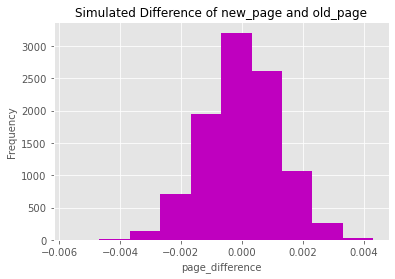

In [26]:
#creat histgram plot for p_diffs:
#first transform to array:
p_diffs = np.array(p_diffs)
plt.style.use("ggplot")
plt.hist(p_diffs, color= "m")
#setup the title and the labels of the plot.
plt.title("Simulated Difference of new_page and old_page",fontsize=12)
plt.xlabel("page_difference",fontsize=10)
plt.ylabel("Frequency",fontsize= 10)

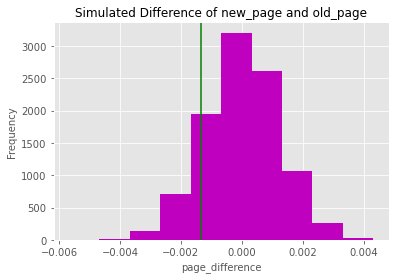

In [27]:
#creat histgram plot to show line statistic
p_diffs = np.array(p_diffs)
plt.hist(p_diffs,color="m")
#setup the title and the labels of the plot.
plt.title("Simulated Difference of new_page and old_page",fontsize=12)
plt.xlabel("page_difference",fontsize=10)
plt.ylabel("Frequency",fontsize= 10)
plt.axvline(x= diff, color='g');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
control = df2.query('group == "control"')
treatment = df2.query('group == "treatment"')

# find observed difference to find the p_value
obs_diff = treatment.converted.mean() - control.converted.mean()
(p_diffs > obs_diff).mean() # the proportion of the p_diffs = 0.90

0.9002

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**My answer.**
* P-value is what I calculated in section J.
* 90% is the proportion of the p_diffs.
* to accept H0 p-value, It must be greater than the suggested p-value.
**If p-value <= 0.05 (small): strong proof against the null (reject the null)**
**If p-value > 0.05 (large): weak proof against the null (fail to reject the null)**
* So I can not reject the null hypothesis and keep the old page because it is better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 & landing_page=="old_page"')) #rows converted with old page
convert_new = len(df2.query('converted==1 & landing_page=="new_page"')) #rows converted with new page
n_old = len(df2.query('landing_page=="old_page"')) #rows related with old page
n_new = len(df2.query('landing_page=="new_page"')) #rows related with new page

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
#Computing ztest and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 

#display z_score and p_value
print(z_score) # 1.31092
print(p_value) # 0.9050

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**My answer.**
* z-score is 1.3109
* p-value is 0.9050
* Based on the z-score and p-value, I accept the null hypothesis.
* The conclusion is similar to part j, that there is no evidence to reject the null hypothesis.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### **My answer**
#### Since I will deal with a binary variable. I will use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
#Build a column called intercept:
df2['intercept'] = 1

#Build a dummy variable column:

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# check to make sure the columns was added:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
import statsmodels.api as sm
#build Logit regression model for conveted variable and  ab_page:
Log_model =sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#show the result:
result =Log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
#the summary of the model:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:59:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### **My answer:**
#### There are only two possible outcomes in a logistic regression:
$H_0: p_{new} - p_{old} = 0$

$H_1: p_{new} - p_{old} != 0$


#### Hypothesis in Part II ::

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### **My answer:**

##### It appears that neither the treatment nor the control page has much of an effect on whether users convert. It is probably important to look for other factors that might have good predict conversion.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# read countries dataset:
countries_df = pd.read_csv(r'/Users/reem/Desktop/countries.csv')


#read the head of the data:
countries_df.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
### Create the necessary dummy variables:
countries_df[['UK','US']] = pd.get_dummies(countries_df['country'])[['UK','US']]
# drop the country column since this is not necessary
countries_df = countries_df.drop('country', 1)
countries_df.head()

,user_id,UK,US
0,834778,1,0
1,928468,0,1
2,822059,1,0
3,711597,1,0
4,710616,1,0


In [40]:
# #join two datas (inner join)
df_new = df2.join(countries_df.set_index('user_id'), on='user_id')
#read the head of the data:
df_new.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# creat interaction column
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']

In [48]:
### Fit Your Linear Model And Obtain the Results:
country_model = sm.Logit(df_new['converted'],df_new[['intercept','UK','US', 'ab_page','US_ab_page', 'UK_ab_page']])
result = country_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:10:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

#### My answer:
###### According to the above:
* The p-value is not significant.
* The country has no significant impact on conversion.
* I can not reject the null hypothesis.
* The new page does not convert more than the old page.

# Conclusion:

On the statistical tests I used the general result is that I do not have sufficient evidence to suggest that the new page results in more conversions than the old one. So I fail to reject the null hypothesis.

